# Feature Engineering

Feature Engineering is basically the methodologies applied over the features to process them in a certain way where a particular Machine Learning model will be able to consume them. Feature Engineering or Feature Processing helps reduce `Over-fitting`, `Under-fitting`, `Weight Optimizations` etc.

1. `Normalization` : This is a method to bring the data onto a particular scale or Normalization usually means to scale a variable to have a values between 0 and 1.

2. `Standardization` : This is again a most commonly used feature scaling technique which normalize the data in such a way where the newly generated distribution will have Mean 0 and Standard Deviation as 1. The formula for standardization is also called as Z-Score formula which converts a Normal Distribution into a Standard Normal Distribution.

3. `Log Transformations` : This is another technique for data normalization. It brings down the data into a particular range. These transformations are generally used for the skewed data where the higher magnitude confines toward the center.

4. `Feature Encoding` : Feature Encoding is used to convert the categorical features into the numerical values by using various encoding techniques. Most commonly used feature encoding methodologies used in the Analytics industry are One-Hot Encoding, Orthogonal Encoding, Dummy Encoding etc.

5. `Principal Component Analysis` : Commonly known as PCA is a technique used for dimension reduction. It takes all the features correlated or uncorrelated and generate the new features called as Principal Components which are orthogonal to each other or uncorrelated in nature. PCA should be only used when the number of features are more in number.

6. `Data Imputation` : Missing values in the columns can be imputed by using Central Tendency Theorem. For Numerical features Mean and Median can be used while for Categorical features Mode can be used to impute the null values. Apart from these few other techniques are also available like Zero Fill, Backward Filling, Forward Filling etc.

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [53]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [54]:
os.chdir('/Users/soumyadeepray/My Documents/DS_Projects/BCG_Customer_Churn_Case_Study/data')

---
## 2. Load data

In [55]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [56]:
df.head(5)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak_y,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


---

## 3. Feature engineering

#### Difference between off-peak prices in December and preceding January

In [57]:
price_df = pd.read_csv('./price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [58]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [59]:
df = pd.merge(df, diff, on='id')
df.head(5)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak_y,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1,0.020057,3.700961
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,-0.004670,0.177779
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,-0.006192,0.162916


#### Aggregate average prices per company


In [60]:
mean_prices = price_df.groupby(['id']).agg({'price_off_peak_var':'mean', 
                                           'price_peak_var':'mean',
                                           'price_mid_peak_var':'mean',
                                           'price_off_peak_fix':'mean', 
                                           'price_peak_fix':'mean',
                                           'price_mid_peak_fix':'mean'}
                                           ).reset_index()

#### Calculate the mean difference between consecutive periods (price_off_peak -> price_peak -> price_mid_peak)


In [61]:
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0.020545,0.030633,0.051178,16.280694,8.140345,24.421038
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.146426,0.000000,0.146426,44.385450,0.000000,44.385450
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.181558,0.000000,0.181558,45.319710,0.000000,45.319710
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,0.020465,0.029260,0.049725,16.258972,8.129484,24.388456
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.147926,0.000000,0.147926,44.266930,0.000000,44.266930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,0.023739,0.034344,0.058083,16.258971,8.129484,24.388455
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,0.147137,0.000000,0.147137,44.311375,0.000000,44.311375
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,0.024382,0.034655,0.059037,16.264402,8.132199,24.396601
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,0.020359,0.029764,0.050123,16.242682,8.121339,24.364021


In [62]:
columns = ['id', 
           'off_peak_peak_var_mean_diff', 
           'peak_mid_peak_var_mean_diff',
           'off_peak_mid_peak_var_mean_diff', 
           'off_peak_peak_fix_mean_diff',
           'peak_mid_peak_fix_mean_diff', 
           'off_peak_mid_peak_fix_mean_diff']
df = pd.merge(df, mean_prices[columns], on='id')
df.head(5)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_year_price_med_peak_y,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,8.182687,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.000000,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,16.365274,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


#### Aggregate average prices per period per company


In [63]:
mean_prices_per_month = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var':'mean', 
                                           'price_peak_var':'mean',
                                           'price_mid_peak_var':'mean',
                                           'price_off_peak_fix':'mean', 
                                           'price_peak_fix':'mean',
                                           'price_mid_peak_fix':'mean'}
                                           ).reset_index()

In [64]:
mean_prices_per_month['off_peak_peak_var_mean_diff'] = mean_prices_per_month['price_off_peak_var'] - mean_prices_per_month['price_peak_var']
mean_prices_per_month['peak_mid_peak_var_mean_diff'] = mean_prices_per_month['price_peak_var'] - mean_prices_per_month['price_mid_peak_var']
mean_prices_per_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_per_month['price_off_peak_var'] - mean_prices_per_month['price_mid_peak_var']
mean_prices_per_month['off_peak_peak_fix_mean_diff'] = mean_prices_per_month['price_off_peak_fix'] - mean_prices_per_month['price_peak_fix']
mean_prices_per_month['peak_mid_peak_fix_mean_diff'] = mean_prices_per_month['price_peak_fix'] - mean_prices_per_month['price_mid_peak_fix']
mean_prices_per_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_per_month['price_off_peak_fix'] - mean_prices_per_month['price_mid_peak_fix']

#### Calculate the maximum monthly difference across time periods


In [65]:
max_diff_across_periods_months = mean_prices_per_month.groupby(['id']).agg({'off_peak_peak_var_mean_diff':'max', 
                                           'peak_mid_peak_var_mean_diff':'max',
                                           'off_peak_mid_peak_var_mean_diff':'max',
                                           'off_peak_peak_fix_mean_diff':'max', 
                                           'peak_mid_peak_fix_mean_diff':'max',
                                           'off_peak_mid_peak_fix_mean_diff':'max'}
                                           ).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [66]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.051309,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775,24.43733


#### Tenure of the client subscription

In [67]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/np.timedelta64(1,'Y')).astype(int)

<AxesSubplot:xlabel='tenure', ylabel='churn'>

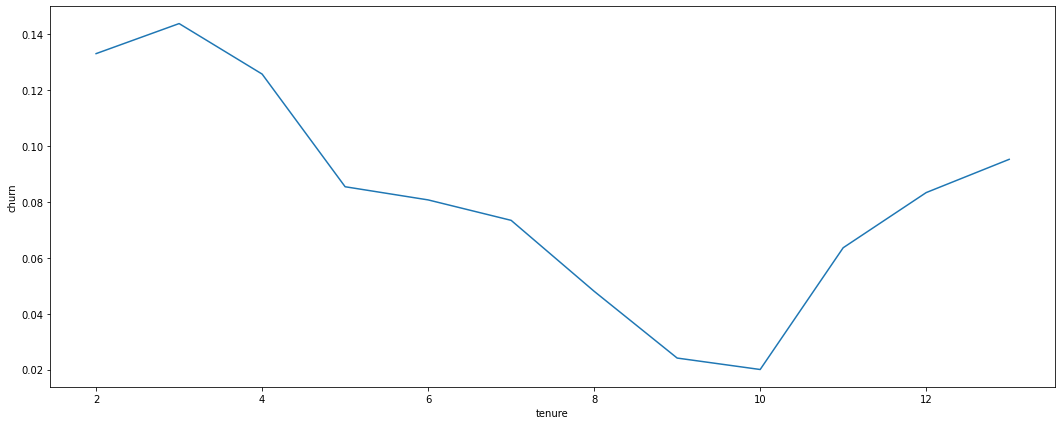

In [68]:
plt.figure(figsize=(18,7))
sns.lineplot(data= df.groupby('tenure').agg({'churn':'mean'}).sort_values(by='churn', ascending=False).reset_index(), x='tenure', y='churn')

Companies who have been clients for less than 4 years are more likely to churn. The churn rate increases after 10 years of subscription.

#### Transform dates into months 

In [69]:
df[['date_activ', 'date_end', 'date_modif_prod','date_renewal']]

,date_activ,date_end,date_modif_prod,date_renewal
0,2013-06-15,2016-06-15,2015-11-01,2015-06-23
1,2009-08-21,2016-08-30,2009-08-21,2015-08-31
2,2010-04-16,2016-04-16,2010-04-16,2015-04-17
3,2010-03-30,2016-03-30,2010-03-30,2015-03-31
4,2010-01-13,2016-03-07,2010-01-13,2015-03-09
...,...,...,...,...
14600,2012-05-24,2016-05-08,2015-05-08,2014-05-26
14601,2012-08-27,2016-08-27,2012-08-27,2015-08-28
14602,2012-02-08,2016-02-07,2012-02-08,2015-02-09
14603,2012-08-30,2016-08-30,2012-08-30,2015-08-31


In [70]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [71]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

In [72]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head(5)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,...,0.085483,0.146033,44.266930,8.145775,44.26693,3,30,5,2,6
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,...,0.085483,0.151367,44.444710,0.000000,44.44471,7,76,7,76,4
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,...,0.089162,0.172468,44.444710,0.000000,44.44471,6,68,3,68,8
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,...,0.000000,0.153133,44.444710,0.000000,44.44471,6,69,2,69,9
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,...,0.033743,0.055866,16.291555,8.145775,24.43733,6,71,2,71,9


#### Transforming boolean data

`has_gas` :- we simply want to transform this column from being categorical to being a binary flag.

In [73]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

,churn
has_gas,
0,0.100544
1,0.081887


Customers who buy multiple products from company are loyal towards the company. Churn Rate is comparatively lower.

#### Transforming categorical data

In [22]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [23]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')

#Dropping categories having very less values
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,...,3,30,5,2,6,0,0,1,0,0
1,1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,...,7,76,7,76,4,1,0,0,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,...,6,68,3,68,8,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,...,6,69,2,69,9,0,0,0,1,0
4,4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,...,6,71,2,71,9,1,0,0,0,0


#### Transforming numerical data

In [24]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460500e+04,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,1.592303e+05,2.809108e+04,16091.371448,1868.638618,1399.858747,0.966450,63.090448,0.137282,0.050488,43.130085
std,5.734836e+05,1.629786e+05,64366.262314,2387.651549,3247.876793,5.108355,66.166636,0.024623,0.049037,4.486140
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411600e+04,0.000000e+00,793.000000,1112.610000,314.000000,0.000000,18.800000,0.143166,0.084138,44.311378
75%,4.076400e+04,0.000000e+00,3383.000000,2402.270000,1746.000000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


Apply log10 transformation

In [25]:
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [26]:
df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,4.223945,0.778978,2.264801,2.962162,1.784733,0.966450,1.517233,0.137282,0.050488,43.130085
std,0.884545,1.716828,1.769266,0.683612,1.584972,5.108355,0.571489,0.024623,0.049037,4.486140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.753966,0.000000,0.000000,2.695464,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701
50%,4.149742,0.000000,2.899821,3.046733,2.498311,0.000000,1.296665,0.143166,0.084138,44.311378
75%,4.610287,0.000000,3.529430,3.380803,3.242293,0.000000,2.120673,0.146348,0.098837,44.311378
max,6.792889,6.618528,5.887169,4.918575,5.243970,30.000000,2.778376,0.273963,0.195975,59.266378


/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

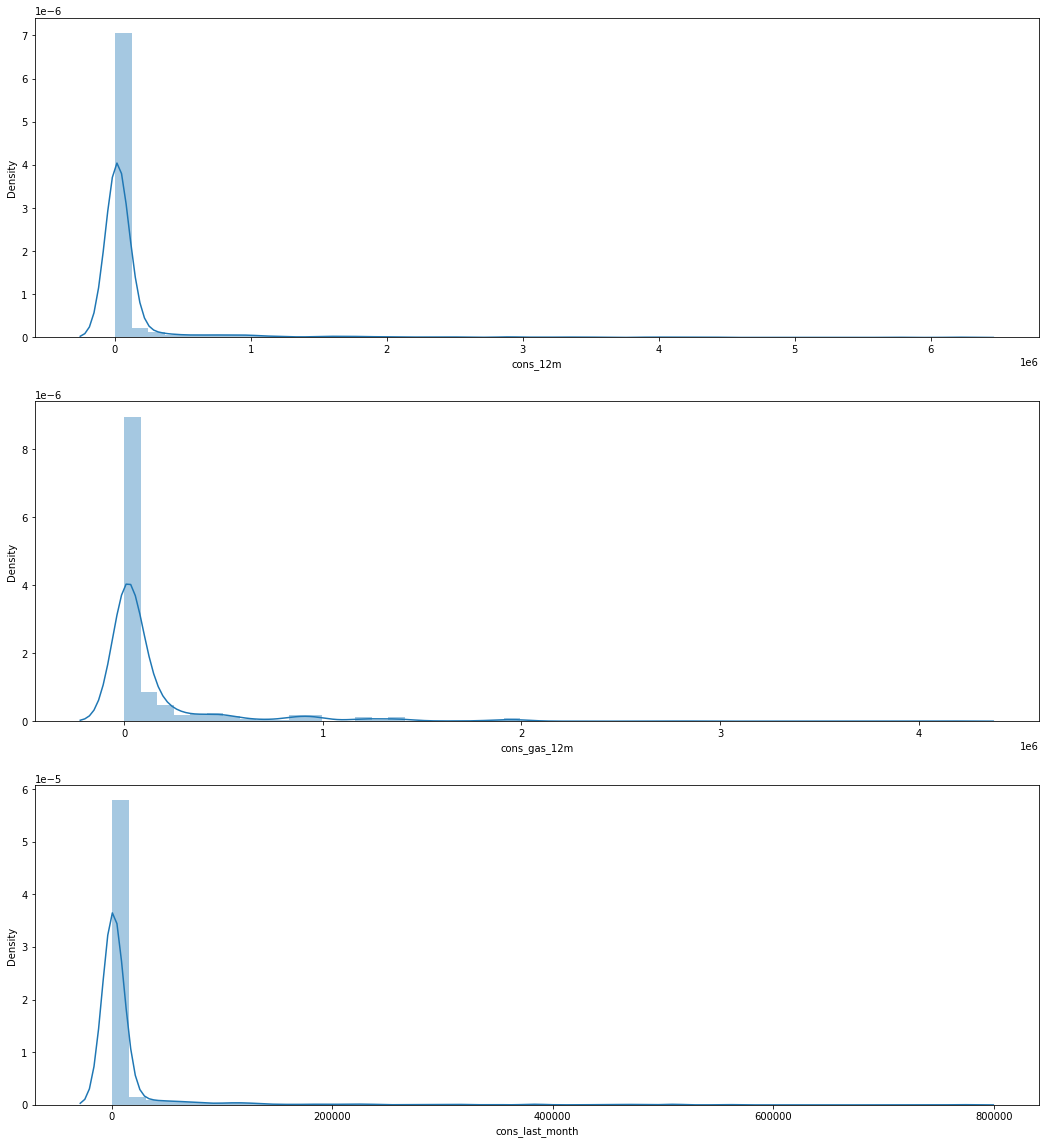

In [74]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

#### Corelations

This is important because it reveals the linear relationships between features. We want features to correlate with churn, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model (as stated earlier) is that all features must be independent.

For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption.

Ideally, you want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

So now let's look at how all the features within the model are correlated.

In [75]:
correlation = df.corr().abs()

/var/folders/jk/45pfmj415lb9l0__2lq4xmr40000gn/T/ipykernel_18931/2751692514.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().abs()


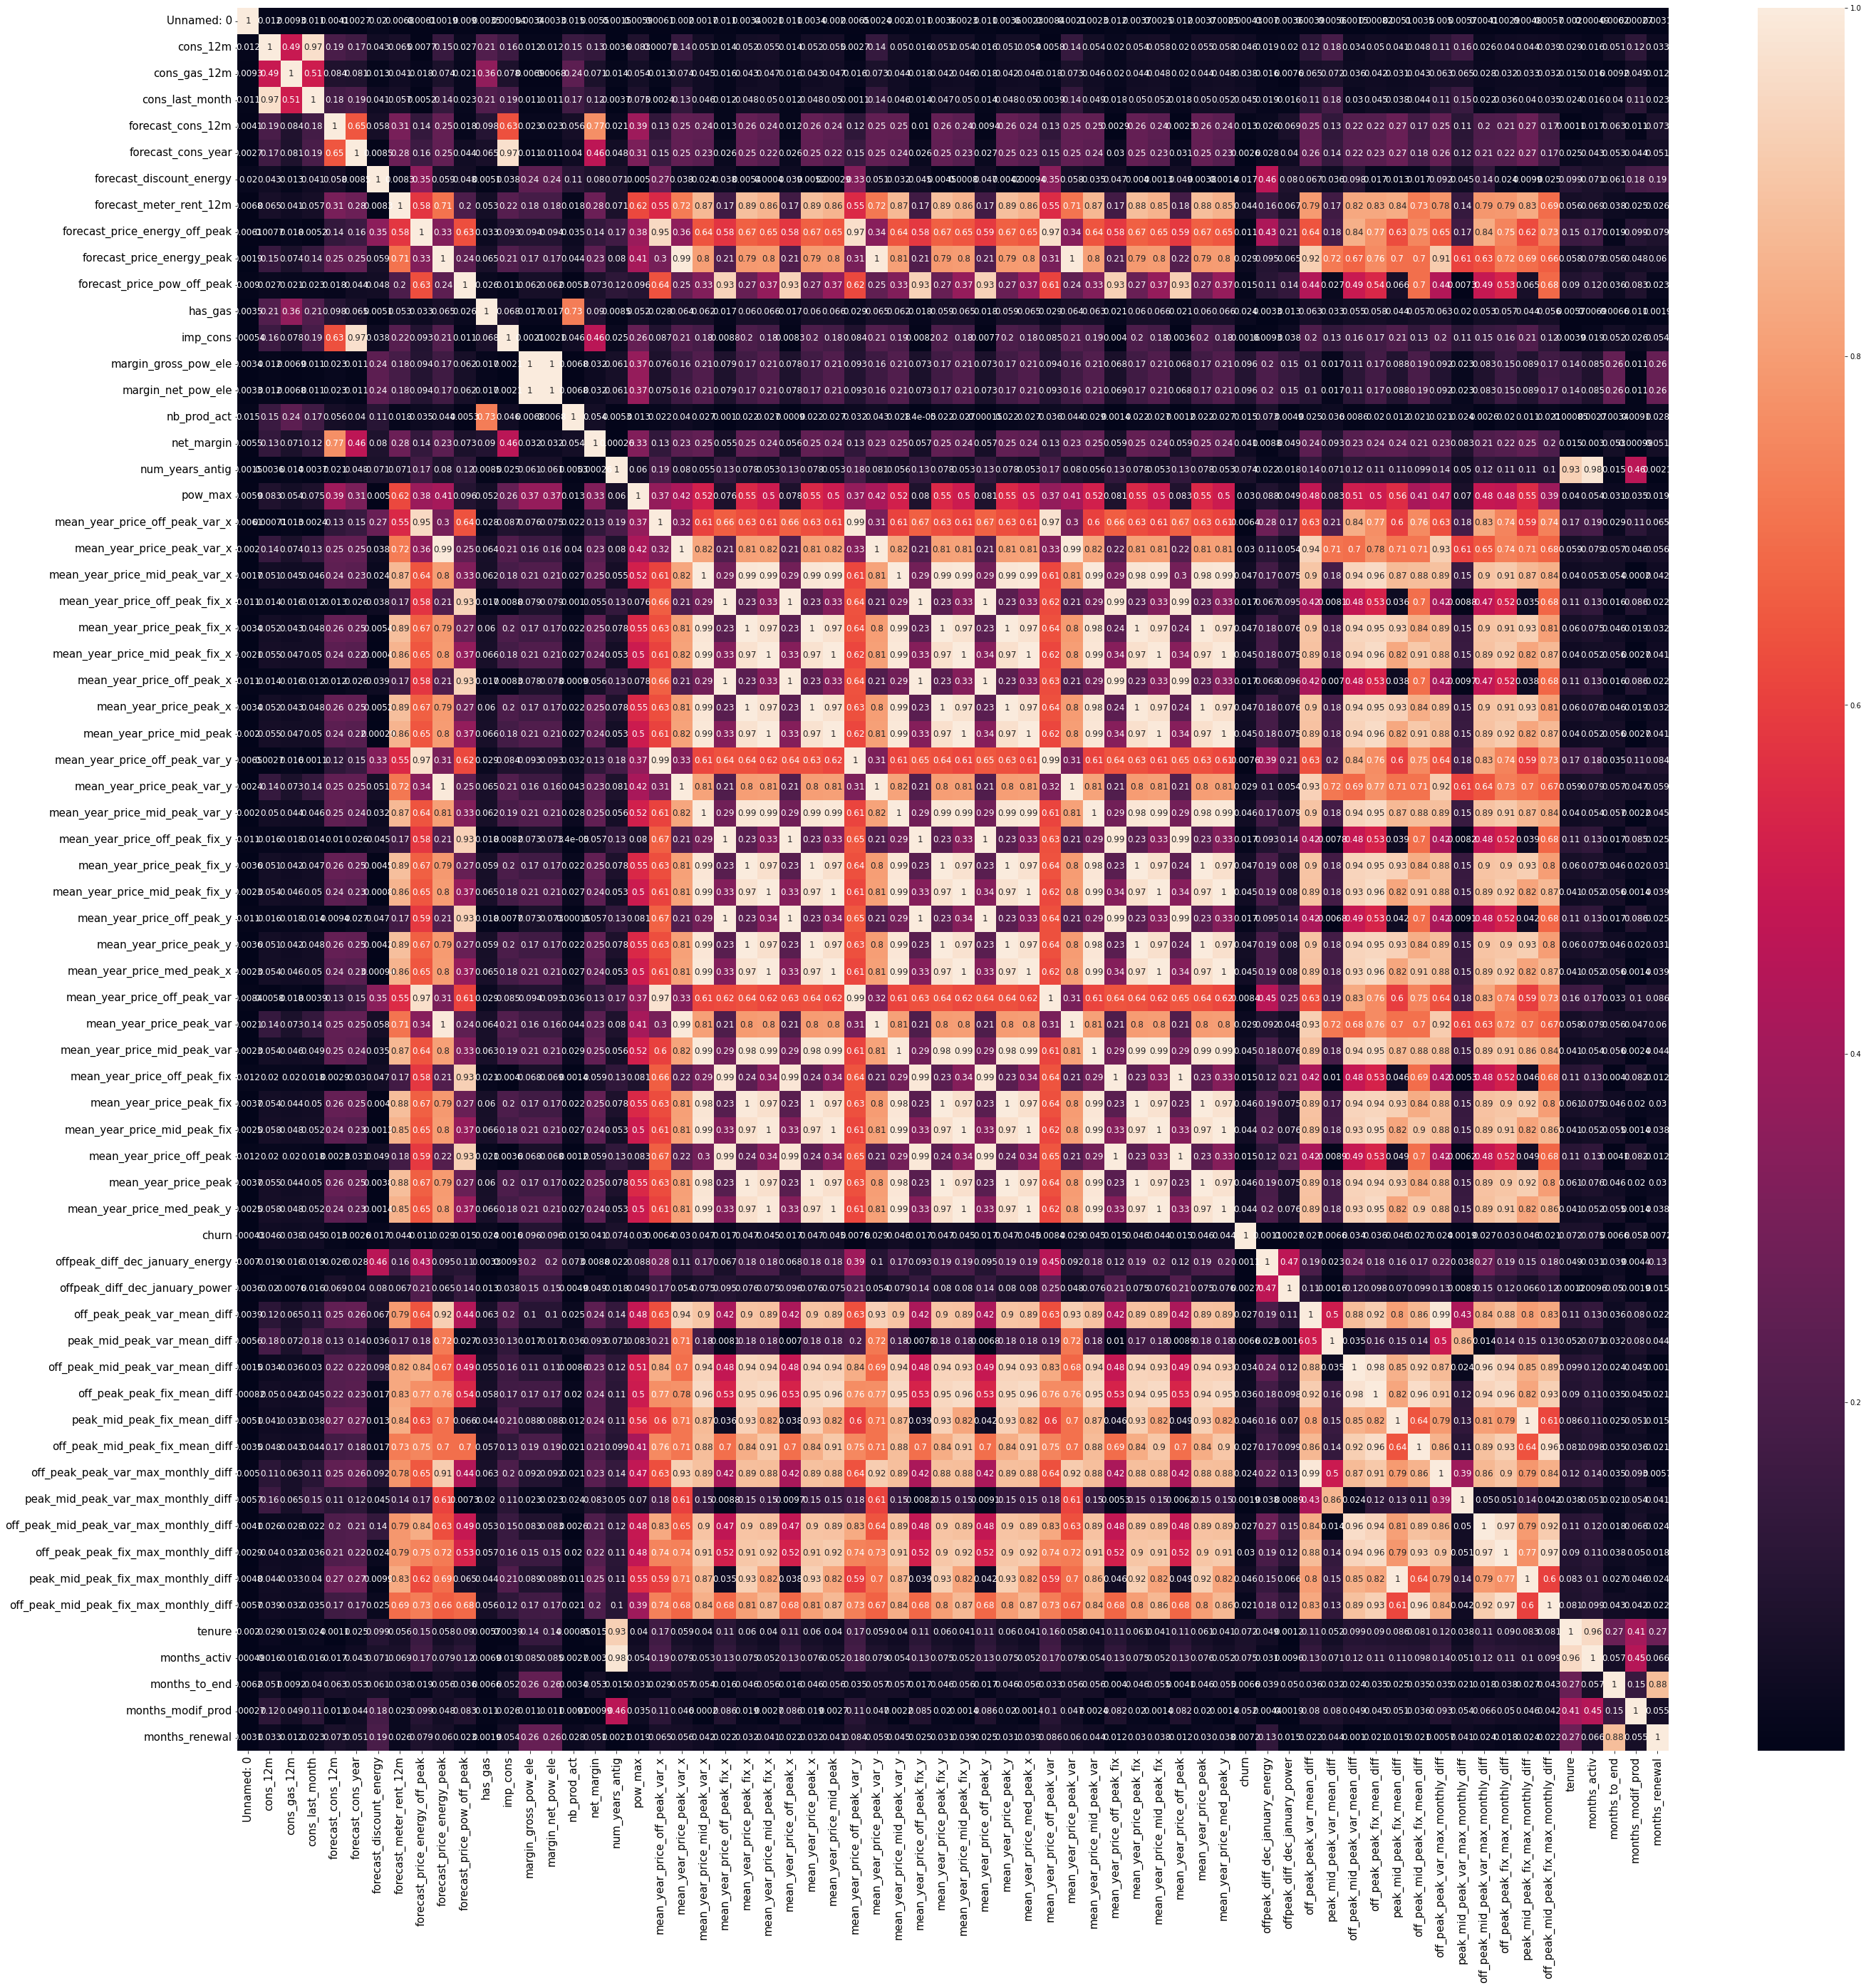

In [76]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

We can remove the highly correlated variables.

`Multicollinearity` happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy.This can lead to skewed or misleading results. Luckily, decision trees and boosted trees algorithms are immune to multicollinearity by nature. When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or Linear Regression are not immune to that problem and should be fixed before training the model.

As expected, num_years_antig has a high correlation with months_activ (it provides us the same information).

We can remove variables with very high correlation.

In [77]:
df.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)

#### Removing outliers

As we identified during the exploratory phase, the consumption data has several outliers. We are going to remove those outliers
What are the criteria to identify an outlier?

The most common way to identify an outlier are:

    1. Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile

OR

    2. Data point that falls outside of 3 standard deviations.

Once, we have identified the outlier, What do we do with the outliers?

There are several ways to handle with those outliers such as removing them (this works well for massive datasets) or replacing them with sensible data
(works better when the dataset is not that big).

We will replace the outliers with the mean (average of the values excluding outliers).

In [78]:
def replace_outliers_z_score(dataframe, column, Z=3):
    """
 Replace outliers with the mean values using the Z score.
 Nan values are also replaced with the mean values.
 Parameters
 ----------
 dataframe : pandas dataframe
 Contains the data where the outliers are to be found
 column : str
 Usually a string with the name of the column

 Returns
 -------
 Dataframe
 With outliers under the lower and above the upper bound removed
    """
    df_copy = dataframe.copy(deep=True)
    df_copy.dropna(inplace=True, subset=[column])

    # Calculate mean without outliers
    df_copy["zscore"] = zscore(df_copy[column])
    mean_ = df_copy[(df_copy["zscore"] > -Z) & (df_copy["zscore"] < Z)][column].mean()

    # Replace with mean values
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [79]:
df = replace_outliers_z_score(df,"cons_12m")
df = replace_outliers_z_score(df,"cons_gas_12m")
df = replace_outliers_z_score(df,"cons_last_month")
df = replace_outliers_z_score(df,"forecast_cons_12m")
df = replace_outliers_z_score(df,"forecast_discount_energy")
df = replace_outliers_z_score(df,"forecast_meter_rent_12m")
#df = replace_outliers_z_score(df,"forecast_price_energy_p1")
#df = replace_outliers_z_score(df,"forecast_price_energy_p2")
#df = replace_outliers_z_score(df,"forecast_price_pow_p1")
df = replace_outliers_z_score(df,"imp_cons")
df = replace_outliers_z_score(df,"margin_gross_pow_ele")
df = replace_outliers_z_score(df,"margin_net_pow_ele")
df = replace_outliers_z_score(df,"net_margin")
df = replace_outliers_z_score(df,"pow_max")
df = replace_outliers_z_score(df,"months_activ")
df = replace_outliers_z_score(df,"months_to_end")
df = replace_outliers_z_score(df,"months_modif_prod")
df = replace_outliers_z_score(df,"months_renewal")

Replaced: 345  outliers in  cons_12m
Replaced: 248  outliers in  cons_gas_12m
Replaced: 336  outliers in  cons_last_month
Replaced: 167  outliers in  forecast_cons_12m
Replaced: 510  outliers in  forecast_discount_energy
Replaced: 162  outliers in  forecast_meter_rent_12m
Replaced: 153  outliers in  imp_cons
Replaced: 238  outliers in  margin_gross_pow_ele
Replaced: 238  outliers in  margin_net_pow_ele
Replaced: 76  outliers in  net_margin
Replaced: 302  outliers in  pow_max
Replaced: 385  outliers in  months_activ
Replaced: 2  outliers in  months_to_end
Replaced: 141  outliers in  months_modif_prod
Replaced: 112  outliers in  months_renewal


In [80]:
df.reset_index(drop=True, inplace=True)

#### Pickling


We will pickle the data so that we can easily retrieve it for the next exercise

In [81]:
os.getcwd()

'/Users/soumyadeepray/My Documents/DS_Projects/BCG_Customer_Churn_Case_Study/data'

In [82]:
pd.to_pickle(df, "./processed_data.pkl")

#### References

https://mlcourse.ai/book/topic06/topic6_feature_engineering_feature_selection.html